<a href="https://colab.research.google.com/github/Icamtu/ML/blob/main/kamaleswar_mohanta_1F_Credit_Card_Acquisition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Data Link https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

# About Dataset

A Credit Card Dataset for Machine Learning!

# Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Credit score cards are based on historical data.Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
Predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. 

# Task

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. 

# Project Objective
Background Goal, Number of Resources, Business Impact, Time Taken

# **Importing Libraries**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [ ]:
# application_record reading
application_record=pd.read_csv('https://raw.githubusercontent.com/Icamtu/ML/main/application_record.csv')
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
# credit_record reading
credit_record=pd.read_csv('https://raw.githubusercontent.com/Icamtu/ML/main/credit_record.csv')
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


# Data Exploration and Validation

# application_record

In [ ]:
# application_record information about dtypes, range, entries,variables,memory usage
application_record.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
application_record.shape

(438557, 18)

In [ ]:
# No of unique records
application_record.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [ ]:
# No OF Duplicate ID
application_record['ID'].duplicated().value_counts()

False    438510
True         47
Name: ID, dtype: int64

In [ ]:
#drop 47 duplicate records from ID
application_record=application_record.drop_duplicates(subset=['ID'])

In [ ]:
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0



# **credit_record**

In [ ]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
# number of rows and columns
credit_record.shape

(1048575, 3)

In [ ]:
# No of Unique records
credit_record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [ ]:
credit_record['ID'].duplicated().value_counts()

True     1002590
False      45985
Name: ID, dtype: int64

how many months account has been open for which can be a parameter to co-relate with risky accounts

In [ ]:
#Finding account opening period
record=pd.DataFrame(credit_record.groupby(["ID"])["MONTHS_BALANCE"].min())
record


,MONTHS_BALANCE
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5150482,-28
5150483,-17
5150484,-12


In [ ]:
# Renaming it to Account Length
record=record.rename(columns={'MONTHS_BALANCE':'Account Length'}) 
record

,Account Length
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5150482,-28
5150483,-17
5150484,-12


In [ ]:
# Removing Negetive value
record['Account Length']=-record['Account Length']
record

,Account Length
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59
...,...
5150482,28
5150483,17
5150484,12


In [ ]:
#Merging Account Length with application_record
application_record=pd.merge(application_record,record,how="left",on="ID") 
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account Length
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN
438506,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN
438507,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN
438508,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN


# Finding Target variable

From credit records 'STATUS' ,target variable can be derived as X, C & 0 are not Risky,but 1,2,3,4,5 are Risky

In [ ]:
# Creating Target Variable
credit_record['Target']=credit_record['STATUS']
credit_record['Target'].replace('X', 0, inplace=True)
credit_record['Target'].replace('C', 0, inplace=True)
credit_record['Target']=credit_record['Target'].astype(int) #converting dtypes STR TO int
credit_record.loc[credit_record['Target']>=1,'Target']=1


In [ ]:
print(credit_record['Target'].value_counts())



0    1034381
1      14194
Name: Target, dtype: int64


In [ ]:
#Creating df where high Risk is Target=1
target_df=pd.DataFrame(credit_record.groupby(['ID'])['Target'].max()).reset_index()
target_df

,ID,Target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [ ]:
# merging(Inner join:do not need null target value) target_df with credit_application_record on ID as Target variable
credit_application_record=pd.merge(left=application_record,right=target_df, how='inner', on=['ID'])
credit_application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account Length,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,11.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,23.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,32.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,9.0,1


In [ ]:
credit_application_record['Target'].value_counts()

0    32166
1     4291
Name: Target, dtype: int64

# credit_application_record details

In [ ]:
# credit_application_record information about dtypes, range, entries,variables,memory usage
credit_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [ ]:
credit_application_record.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'House',
                         'CNT_CHILDREN':'NoOfChild','AMT_INCOME_TOTAL':'IncomeTotal',
                         'NAME_EDUCATION_TYPE':'Education','NAME_FAMILY_STATUS':'FamilyType',
                        'NAME_HOUSING_TYPE':'HouseType','DAYS_BIRTH':'AgebyDay','DAYS_EMPLOYED':'EmpExpbyDay','FLAG_MOBIL':'mobile','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'IncomeType','FLAG_WORK_PHONE':'WkPhone',
                         'FLAG_PHONE':'Phone','CNT_FAM_MEMBERS':'FamSize',
                        'OCCUPATION_TYPE':'OccupationType'
                        },inplace=True)


In [ ]:
# number of rows and columns
credit_application_record.shape

(36457, 20)

In [ ]:
credit_application_record.nunique()

ID                36457
Gender                2
Car                   2
House                 2
NoOfChild             9
IncomeTotal         265
IncomeType            5
Education             5
FamilyType            5
HouseType             6
AgebyDay           7183
EmpExpbyDay        3640
mobile                1
WkPhone               2
Phone                 2
email                 2
OccupationType       18
FamSize              10
Account Length       61
Target                2
dtype: int64

In [ ]:
# sum of null values in each variables
credit_application_record.isnull().sum()

ID                    0
Gender                0
Car                   0
House                 0
NoOfChild             0
IncomeTotal           0
IncomeType            0
Education             0
FamilyType            0
HouseType             0
AgebyDay              0
EmpExpbyDay           0
mobile                0
WkPhone               0
Phone                 0
email                 0
OccupationType    11323
FamSize               0
Account Length        0
Target                0
dtype: int64

note:OCCUPATION_TYPE Has NULL value

In [ ]:
# any suspicious variables
credit_application_record.columns.values

array(['ID', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'IncomeType', 'Education', 'FamilyType', 'HouseType', 'AgebyDay',
       'EmpExpbyDay', 'mobile', 'WkPhone', 'Phone', 'email',
       'OccupationType', 'FamSize', 'Account Length', 'Target'],
      dtype=object)

In [ ]:
#Display the variable formats
credit_application_record.dtypes

ID                  int64
Gender             object
Car                object
House              object
NoOfChild           int64
IncomeTotal       float64
IncomeType         object
Education          object
FamilyType         object
HouseType          object
AgebyDay            int64
EmpExpbyDay         int64
mobile              int64
WkPhone             int64
Phone               int64
email               int64
OccupationType     object
FamSize           float64
Account Length    float64
Target              int64
dtype: object

note:Need to convert FamSize & Account Length  into int dtypes
Gender,Car,House,mobile,wkPhone,Phone,email to int dtypes from y/n

In [ ]:
#Print the first 10 observations
credit_application_record.head(10)

,ID,Gender,Car,House,NoOfChild,IncomeTotal,IncomeType,Education,FamilyType,HouseType,AgebyDay,EmpExpbyDay,mobile,WkPhone,Phone,email,OccupationType,FamSize,Account Length,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26.0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26.0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,38.0,0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,20.0,0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,16.0,0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,17.0,0


In [ ]:
#Print the last 10 observations
credit_application_record.tail(10)

,ID,Gender,Car,House,NoOfChild,IncomeTotal,IncomeType,Education,FamilyType,HouseType,AgebyDay,EmpExpbyDay,mobile,WkPhone,Phone,email,OccupationType,FamSize,Account Length,Target
36447,5149145,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-10952,-3577,1,1,0,0,Laborers,2.0,25.0,1
36448,5149158,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-10952,-3577,1,1,0,0,Laborers,2.0,28.0,1
36449,5149190,M,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,-9847,-502,1,0,1,1,Core staff,3.0,11.0,1
36450,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,1,0,0,0,NaN,2.0,21.0,1
36451,5149775,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,1,0,1,0,Laborers,2.0,19.0,1
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,11.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,23.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,32.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,9.0,1
36456,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,13.0,1


In [ ]:
#Print the random 10 observations
credit_application_record.sample(n=10)

,ID,Gender,Car,House,NoOfChild,IncomeTotal,IncomeType,Education,FamilyType,HouseType,AgebyDay,EmpExpbyDay,mobile,WkPhone,Phone,email,OccupationType,FamSize,Account Length,Target
23155,5095235,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-9868,-1221,1,1,1,0,Laborers,2.0,4.0,0
1687,5010917,M,Y,Y,0,243000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13533,-2535,1,0,1,0,Laborers,2.0,6.0,0
9724,5042064,F,Y,N,2,270000.0,State servant,Higher education,Married,House / apartment,-16053,-7369,1,1,1,0,NaN,4.0,53.0,1
11500,5048050,F,N,Y,0,121500.0,Commercial associate,Higher education,Civil marriage,House / apartment,-11157,-277,1,0,0,0,Accountants,2.0,22.0,0
34914,5148714,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22762,365243,1,0,0,0,NaN,1.0,15.0,0
29605,5117988,F,N,Y,0,32400.0,State servant,Secondary / secondary special,Married,House / apartment,-19200,-5637,1,0,0,0,Managers,2.0,2.0,0
23445,5095699,F,N,N,0,126000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20851,365243,1,0,0,0,NaN,2.0,46.0,0
16150,5065669,F,Y,Y,0,216000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13402,-542,1,0,0,0,NaN,2.0,44.0,0
28412,5116172,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23390,365243,1,0,0,0,NaN,2.0,53.0,0
33442,5142584,M,Y,Y,0,301500.0,Working,Secondary / secondary special,Married,Rented apartment,-9009,-864,1,0,0,0,Laborers,2.0,4.0,0


# **Discrete & Categorical Variable Exploration**

In [ ]:
credit_application_record.dtypes

ID                  int64
Gender             object
Car                object
House              object
NoOfChild           int64
IncomeTotal       float64
IncomeType         object
Education          object
FamilyType         object
HouseType          object
AgebyDay            int64
EmpExpbyDay         int64
mobile              int64
WkPhone             int64
Phone               int64
email               int64
OccupationType     object
FamSize           float64
Account Length    float64
Target              int64
dtype: object

Gender

In [ ]:
# Converting Gender into [0,1] (int dtypes)
credit_application_record["Gender"] =  credit_application_record["Gender"].replace(['F','M'],[0,1])

0    24430
1    12027
Name: Gender, dtype: int64


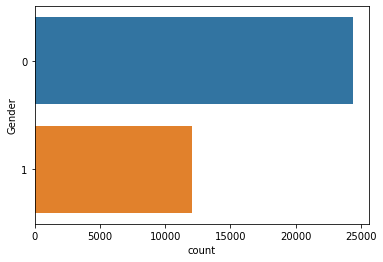

In [ ]:
print(credit_application_record['Gender'].value_counts())
sns.countplot(y="Gender",  data=credit_application_record)

email

0    33186
1     3271
Name: email, dtype: int64


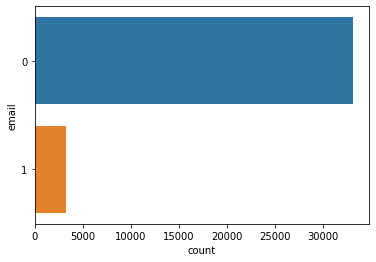

In [ ]:
print(credit_application_record['email'].value_counts())
sns.countplot(y="email",  data=credit_application_record)

Car

In [ ]:
# Converting Car into [0,1] (int dtypes)
credit_application_record["Car"] =  credit_application_record["Car"].replace(['N','Y'],[0,1])

0    22614
1    13843
Name: Car, dtype: int64


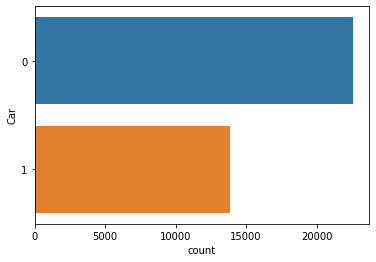

In [ ]:
print(credit_application_record['Car'].value_counts())
sns.countplot(y="Car",  data=credit_application_record)

House

In [ ]:
# Converting House into [0,1] (int dtypes)
credit_application_record["House"] =  credit_application_record["House"].replace(['N','Y'],[0,1])

1    24506
0    11951
Name: House, dtype: int64


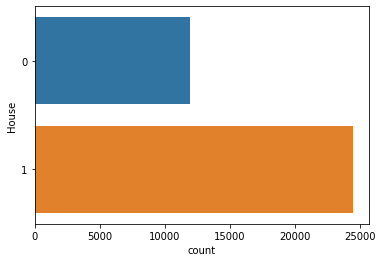

In [ ]:
print(credit_application_record['House'].value_counts())
sns.countplot(y="House",  data=credit_application_record)

mobile

1    36457
Name: mobile, dtype: int64


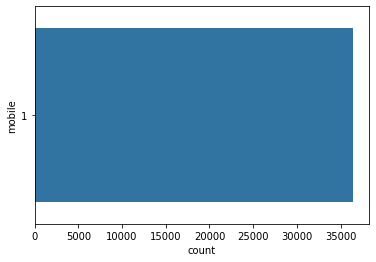

In [ ]:
print(credit_application_record['mobile'].value_counts())
sns.countplot(y="mobile",  data=credit_application_record)

Everyone has mobile SO this variable is not going to add any value, so It should be Dropped
 

In [ ]:
credit_application_record.drop('mobile',axis=1,inplace=True)

In [ ]:
credit_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36457 non-null  int64  
 1   Gender          36457 non-null  int64  
 2   Car             36457 non-null  int64  
 3   House           36457 non-null  int64  
 4   NoOfChild       36457 non-null  int64  
 5   IncomeTotal     36457 non-null  float64
 6   IncomeType      36457 non-null  object 
 7   Education       36457 non-null  object 
 8   FamilyType      36457 non-null  object 
 9   HouseType       36457 non-null  object 
 10  AgebyDay        36457 non-null  int64  
 11  EmpExpbyDay     36457 non-null  int64  
 12  WkPhone         36457 non-null  int64  
 13  Phone           36457 non-null  int64  
 14  email           36457 non-null  int64  
 15  OccupationType  25134 non-null  object 
 16  FamSize         36457 non-null  float64
 17  Account Length  36457 non-null 

NoOfChild

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: NoOfChild, dtype: int64


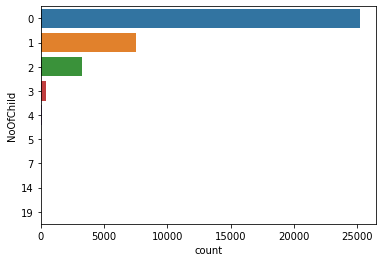

In [ ]:
print(credit_application_record['NoOfChild'].value_counts())
sns.countplot(y="NoOfChild",  data=credit_application_record)

AgebyDay

-12676    54
-15519    54
-16896    38
-14667    37
-15140    32
          ..
-16528     1
-23345     1
-21672     1
-14196     1
-9188      1
Name: AgebyDay, Length: 7183, dtype: int64


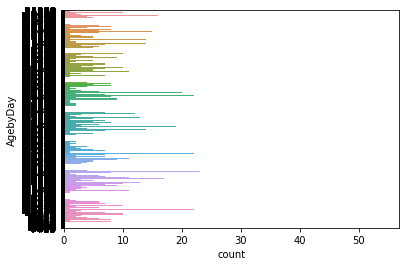

In [ ]:
print(credit_application_record['AgebyDay'].value_counts())
sns.countplot(y="AgebyDay",  data=credit_application_record)

EmpExpbyDay

 365243    6135
-401         78
-1539        64
-200         63
-1678        61
           ... 
-4686         1
-2160         1
-2007         1
-758          1
-11272        1
Name: EmpExpbyDay, Length: 3640, dtype: int64


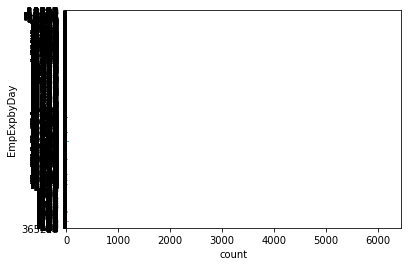

In [ ]:
print(credit_application_record['EmpExpbyDay'].value_counts())
sns.countplot(y="EmpExpbyDay",  data=credit_application_record)

FamSize

In [ ]:
# Changing Dat type from foat to int
credit_application_record['FamSize']=credit_application_record['FamSize'].astype('int')

In [ ]:
credit_application_record['FamSize'].dtypes

dtype('int64')

2     19463
1      6987
3      6421
4      3106
5       397
6        58
7        19
15        3
9         2
20        1
Name: FamSize, dtype: int64


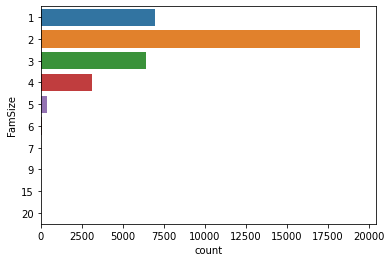

In [ ]:
print(credit_application_record['FamSize'].value_counts())
sns.countplot(y="FamSize",  data=credit_application_record)

Account Length

7.0     889
11.0    828
6.0     824
8.0     820
5.0     816
       ... 
58.0    333
60.0    321
0.0     315
59.0    307
57.0    304
Name: Account Length, Length: 61, dtype: int64


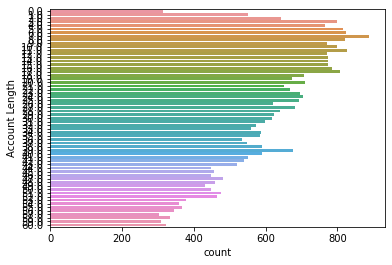

In [ ]:
print(credit_application_record['Account Length'].value_counts())
sns.countplot(y="Account Length",  data=credit_application_record)

WkPhone

0    28235
1     8222
Name: WkPhone, dtype: int64


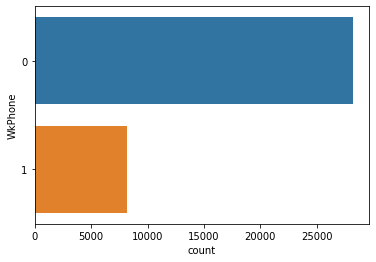

In [ ]:
print(credit_application_record['WkPhone'].value_counts())
sns.countplot(y="WkPhone",  data=credit_application_record)

Phone

0    25709
1    10748
Name: Phone, dtype: int64


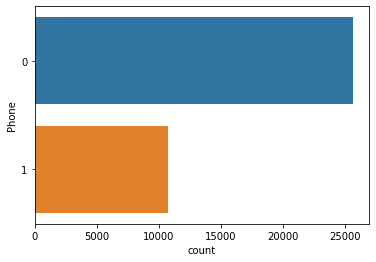

In [ ]:
print(credit_application_record['Phone'].value_counts())
sns.countplot(y="Phone",  data=credit_application_record)

IncomeType

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: IncomeType, dtype: int64


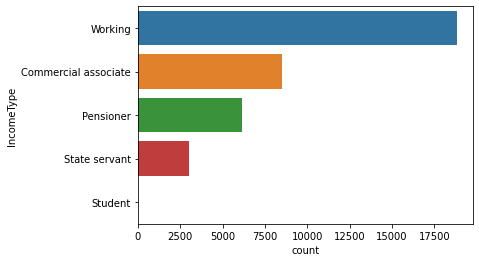

In [ ]:
print(credit_application_record['IncomeType'].value_counts())
sns.countplot(y="IncomeType",  data=credit_application_record)

Education

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: Education, dtype: int64


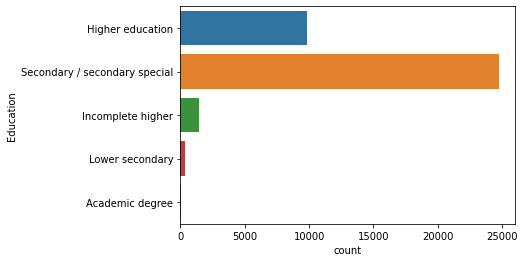

In [ ]:
print(credit_application_record['Education'].value_counts())
sns.countplot(y="Education",  data=credit_application_record)

FamilyType

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: FamilyType, dtype: int64


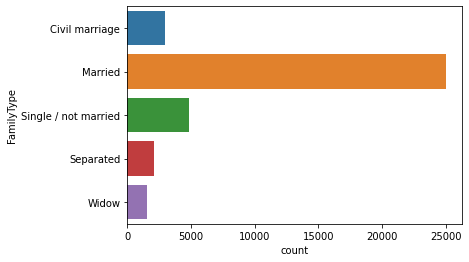

In [ ]:
print(credit_application_record['FamilyType'].value_counts())
sns.countplot(y="FamilyType",  data=credit_application_record)

HouseType

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: HouseType, dtype: int64


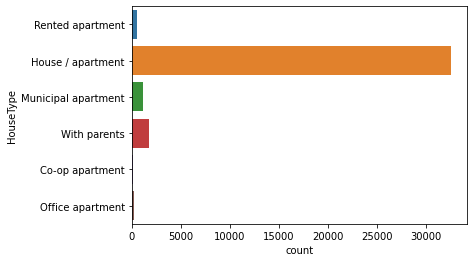

In [ ]:
print(credit_application_record['HouseType'].value_counts())
sns.countplot(y="HouseType",  data=credit_application_record)

OccupationType

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OccupationType, dtype: int64


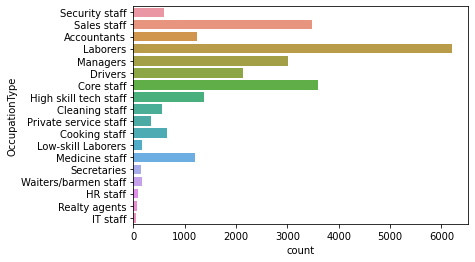

In [ ]:
print(credit_application_record['OccupationType'].value_counts())
sns.countplot(y="OccupationType",  data=credit_application_record)

Target

0    32166
1     4291
Name: Target, dtype: int64


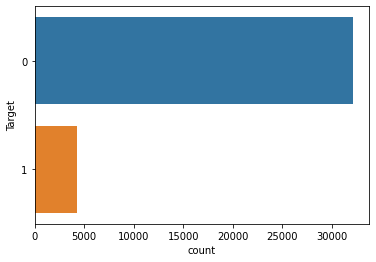

In [ ]:
print(credit_application_record['Target'].value_counts())
sns.countplot(y="Target",  data=credit_application_record)

# Continuous variables exploration

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe83f79cdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe83f7a1890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe83f79c810>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe83f7a6390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe83f7a68d0>],
 'means': []}

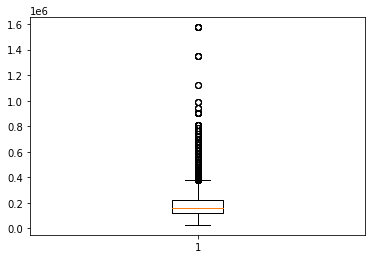

In [ ]:
plt.boxplot(credit_application_record["IncomeTotal"])

(array([2.246e+04, 1.138e+04, 2.099e+03, 2.740e+02, 1.650e+02, 5.800e+01,
        4.000e+00, 3.000e+00, 6.000e+00, 8.000e+00]),
 array([  27000.,  181800.,  336600.,  491400.,  646200.,  801000.,
         955800., 1110600., 1265400., 1420200., 1575000.]),
 <a list of 10 Patch objects>)

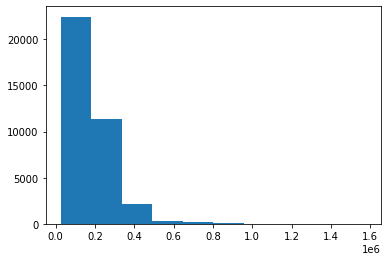

In [ ]:
plt.hist(credit_application_record["IncomeTotal"])

In [ ]:
util_percentiles=credit_application_record['IncomeTotal'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.97,0.98,0.99,1])
round(util_percentiles,2)

0.10      90000.0
0.20     112500.0
0.30     135000.0
0.40     139500.0
0.50     157500.0
0.60     180000.0
0.70     216000.0
0.80     247500.0
0.90     315000.0
0.91     315000.0
0.92     315000.0
0.93     337500.0
0.94     360000.0
0.95     360000.0
0.97     405000.0
0.98     450000.0
0.99     560250.0
1.00    1575000.0
Name: IncomeTotal, dtype: float64

0.01% Outlier negligible

# Data Cleaning and Data Preparation

# Age

In [ ]:
credit_application_record['Age']=-credit_application_record['AgebyDay']//365
credit_application_record['Age']

0        32
1        32
2        58
3        52
4        52
         ..
36452    47
36453    33
36454    33
36455    49
36456    25
Name: Age, Length: 36457, dtype: int64

37    1207
27    1129
28    1126
40    1125
39    1105
34    1057
33    1054
38    1047
32    1041
41    1040
42    1035
35    1013
43    1003
30    1002
36     966
31     944
44     930
29     929
46     893
47     890
51     889
48     871
54     845
50     844
57     833
56     813
59     809
60     803
45     779
53     765
58     752
52     746
49     746
55     656
62     634
64     547
63     544
61     538
26     517
25     489
24     368
65     339
66     268
23     213
22     146
67     120
68      36
21      10
20       1
Name: Age, dtype: int64


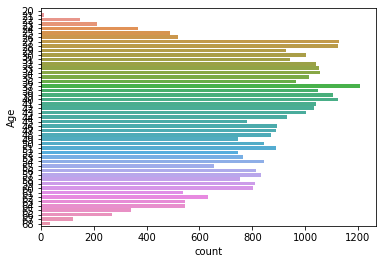

In [ ]:
print(credit_application_record['Age'].value_counts())
sns.countplot(y='Age',data=credit_application_record)

(array([ 738., 4190., 5098., 5338., 4203., 4363., 3990., 3899., 3328.,
        1310.]),
 array([20. , 24.8, 29.6, 34.4, 39.2, 44. , 48.8, 53.6, 58.4, 63.2, 68. ]),
 <a list of 10 Patch objects>)

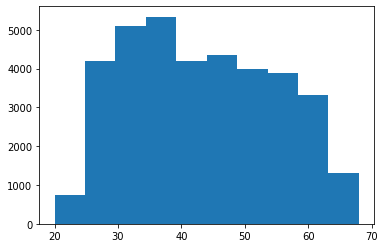

In [ ]:
plt.hist(credit_application_record["Age"])

In [ ]:
# Creating Age Bucket
credit_application_record['Age Bucket']='Young Age'
credit_application_record['Age Bucket'][credit_application_record['Age']>=30]='Mid Young Age'
credit_application_record['Age Bucket'][credit_application_record['Age']>=40]='Mid Age'
credit_application_record['Age Bucket'][credit_application_record['Age']>=50]='Mid Old Age'
credit_application_record['Age Bucket'][credit_application_record['Age']>=60]='Old Age'
credit_application_record

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,ID,Gender,Car,House,NoOfChild,IncomeTotal,IncomeType,Education,FamilyType,HouseType,...,EmpExpbyDay,WkPhone,Phone,email,OccupationType,FamSize,Account Length,Target,Age,Age Bucket
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,0,0,NaN,2,15.0,1,32,Mid Young Age
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,0,0,NaN,2,14.0,1,32,Mid Young Age
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,0,0,0,Security staff,2,29.0,0,58,Mid Old Age
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,0,1,1,Sales staff,1,4.0,0,52,Mid Old Age
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,0,1,1,Sales staff,1,26.0,0,52,Mid Old Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,0,0,0,Managers,2,11.0,1,47,Mid Age
36453,5149834,0,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,0,1,1,Medicine staff,2,23.0,1,33,Mid Young Age
36454,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,0,1,1,Medicine staff,2,32.0,1,33,Mid Young Age
36455,5150049,0,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,0,0,0,Sales staff,2,9.0,1,49,Mid Age


Mid Young Age    10436
Mid Age           9312
Mid Old Age       7952
Young Age         4928
Old Age           3829
Name: Age Bucket, dtype: int64


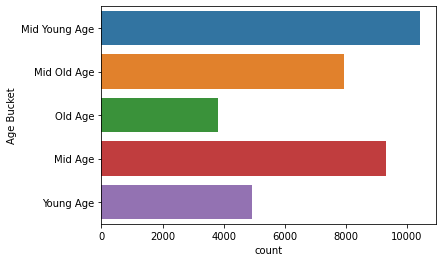

In [ ]:
print(credit_application_record['Age Bucket'].value_counts())
sns.countplot(y='Age Bucket',data=credit_application_record)

# Experience

In [ ]:
credit_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36457 non-null  int64  
 1   Gender          36457 non-null  int64  
 2   Car             36457 non-null  int64  
 3   House           36457 non-null  int64  
 4   NoOfChild       36457 non-null  int64  
 5   IncomeTotal     36457 non-null  float64
 6   IncomeType      36457 non-null  object 
 7   Education       36457 non-null  object 
 8   FamilyType      36457 non-null  object 
 9   HouseType       36457 non-null  object 
 10  AgebyDay        36457 non-null  int64  
 11  EmpExpbyDay     36457 non-null  int64  
 12  WkPhone         36457 non-null  int64  
 13  Phone           36457 non-null  int64  
 14  email           36457 non-null  int64  
 15  OccupationType  25134 non-null  object 
 16  FamSize         36457 non-null  int64  
 17  Account Length  36457 non-null 

In [ ]:
# Converting Experience in Days to Year 
credit_application_record['EmpExperience']=-(credit_application_record['EmpExpbyDay'])//365
credit_application_record['EmpExperience'].value_counts()



-1001    6135
 1       3235
 4       2879
 3       2831
 2       2763
 0       2540
 6       2130
 5       2057
 8       1830
 7       1642
 9       1282
 10      1095
 12       748
 11       712
 14       606
 13       584
 15       580
 18       304
 20       299
 16       269
 19       258
 17       236
 22       190
 21       179
 23       169
 25       156
 27       113
 24       104
 29        86
 26        84
 32        54
 28        52
 31        46
 35        35
 30        33
 33        33
 34        22
 41        20
 39        16
 40        16
 36        14
 38        12
 42         4
 37         3
 43         1
Name: EmpExperience, dtype: int64

In [ ]:
# Converting -ve Experience to 0
credit_application_record.loc[credit_application_record['EmpExperience']<0,'EmpExperience']=0
credit_application_record['EmpExperience'].value_counts()

0     8675
1     3235
4     2879
3     2831
2     2763
6     2130
5     2057
8     1830
7     1642
9     1282
10    1095
12     748
11     712
14     606
13     584
15     580
18     304
20     299
16     269
19     258
17     236
22     190
21     179
23     169
25     156
27     113
24     104
29      86
26      84
32      54
28      52
31      46
35      35
33      33
30      33
34      22
41      20
40      16
39      16
36      14
38      12
42       4
37       3
43       1
Name: EmpExperience, dtype: int64

(array([20383.,  7659.,  3837.,  2275.,  1040.,   619.,   368.,   155.,
           64.,    57.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <a list of 10 Patch objects>)

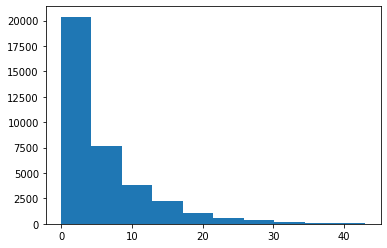

In [ ]:
plt.hist(credit_application_record["EmpExperience"])

In [ ]:
# Creating Experience Bucket
credit_application_record['EmpExp Category']='UnEmloyeed'
credit_application_record['EmpExp Category'][credit_application_record['EmpExperience']>0]='1-9 Years'
credit_application_record['EmpExp Category'][credit_application_record['EmpExperience']>=10]='10-19 Years'
credit_application_record['EmpExp Category'][credit_application_record['EmpExperience']>=20]='20-29 Years'
credit_application_record['EmpExp Category'][credit_application_record['EmpExperience']>=30]='30-39 Years'
credit_application_record['EmpExp Category'][credit_application_record['EmpExperience']>=40]='40+ Years'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

1-9 Years      20649
UnEmloyeed      8675
10-19 Years     5392
20-29 Years     1432
30-39 Years      268
40+ Years         41
Name: EmpExp Category, dtype: int64


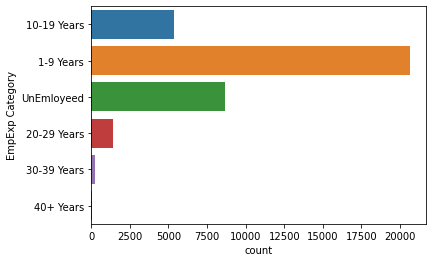

In [ ]:
print(credit_application_record['EmpExp Category'].value_counts())
sns.countplot(y='EmpExp Category',data=credit_application_record,)

In [ ]:
#Creating Employement Status
credit_application_record['Employement Status']=credit_application_record["EmpExperience"]
credit_application_record['Employement Status'][credit_application_record["EmpExperience"]==0]=0  #Unemployeed
credit_application_record['Employement Status'][credit_application_record["EmpExperience"]>0]=1   #Employeed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1    27782
0     8675
Name: Employement Status, dtype: int64


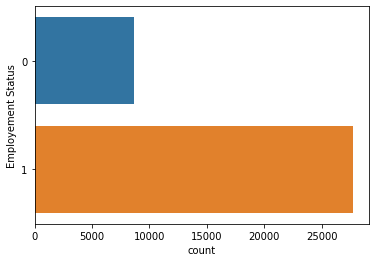

In [ ]:
print(credit_application_record['Employement Status'].value_counts())
sns.countplot(y='Employement Status',data=credit_application_record)

In [ ]:
credit_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  36457 non-null  int64  
 1   Gender              36457 non-null  int64  
 2   Car                 36457 non-null  int64  
 3   House               36457 non-null  int64  
 4   NoOfChild           36457 non-null  int64  
 5   IncomeTotal         36457 non-null  float64
 6   IncomeType          36457 non-null  object 
 7   Education           36457 non-null  object 
 8   FamilyType          36457 non-null  object 
 9   HouseType           36457 non-null  object 
 10  AgebyDay            36457 non-null  int64  
 11  EmpExpbyDay         36457 non-null  int64  
 12  WkPhone             36457 non-null  int64  
 13  Phone               36457 non-null  int64  
 14  email               36457 non-null  int64  
 15  OccupationType      25134 non-null  object 
 16  FamS

# OccupationType   

In [ ]:
#Finding the missing value percentage in OccupationType
(credit_application_record['OccupationType'].isnull().sum()/len(credit_application_record))*100

31.05850728255205

31% missing records

In [ ]:
#Imputation with Missing/NA catagory
credit_application_record['OccupationType_New']=credit_application_record['OccupationType']
credit_application_record.loc[credit_application_record['OccupationType_New'].isnull(),'OccupationType_New']='Missing/NA'


In [ ]:
cross_tab_OccupationType=pd.crosstab(credit_application_record['OccupationType_New'],credit_application_record['Target']).apply(lambda r: (r/r.sum())*100, axis=1)
cross_tab_OccupationType

Target,0,1
OccupationType_New,,
Accountants,88.154714,11.845286
Cleaning staff,88.566243,11.433757
Cooking staff,86.870229,13.129771
Core staff,87.106656,12.893344
Drivers,87.652011,12.347989
HR staff,83.529412,16.470588
High skill tech staff,86.912509,13.087491
IT staff,81.666667,18.333333
Laborers,88.246659,11.753341


missing/na %value is near to Waiters/barmen staff

In [ ]:
#Replacing Missing/NA value With Waiters/barmen staff
credit_application_record['OccupationType_New'][credit_application_record['OccupationType_New']=='Missing/NA']='Waiters/barmen staff'
credit_application_record['OccupationType_New'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Waiters/barmen staff     11497
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OccupationType_New, dtype: int64

Waiters/barmen staff     11497
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OccupationType_New, dtype: int64


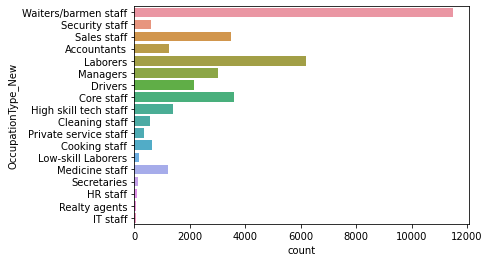

In [ ]:
print(credit_application_record['OccupationType_New'].value_counts())
sns.countplot(y='OccupationType_New',data=credit_application_record)

In [ ]:
credit_application_record['OccupationType_New'].isnull().sum()

0

In [ ]:
credit_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  36457 non-null  int64  
 1   Gender              36457 non-null  int64  
 2   Car                 36457 non-null  int64  
 3   House               36457 non-null  int64  
 4   NoOfChild           36457 non-null  int64  
 5   IncomeTotal         36457 non-null  float64
 6   IncomeType          36457 non-null  object 
 7   Education           36457 non-null  object 
 8   FamilyType          36457 non-null  object 
 9   HouseType           36457 non-null  object 
 10  AgebyDay            36457 non-null  int64  
 11  EmpExpbyDay         36457 non-null  int64  
 12  WkPhone             36457 non-null  int64  
 13  Phone               36457 non-null  int64  
 14  email               36457 non-null  int64  
 15  OccupationType      25134 non-null  object 
 16  FamS

# Model Building
Select the right model, Include Feature Engineering, Perform Model Validation, Multiple models and performance comparison

# Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc

# Model Deployment

Optional step